In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import isoweek

In [24]:
data_url = "https://www.sentiweb.fr/datasets/all/inc-7-PAY.csv"

In [39]:
import pandas as pd

# Première lecture (celle que vous aviez)
data = pd.read_csv("https://www.sentiweb.fr/datasets/all/inc-7-PAY.csv")

# Relecture avec les bons paramètres
raw_data = pd.read_csv("https://www.sentiweb.fr/datasets/all/inc-7-PAY.csv", 
                       encoding='iso-8859-1', 
                       skiprows=1)
raw_data

week  indicator    inc  inc_low  inc_up  inc100  inc100_low  \
0     202541          7   3740     1629    5851       6           3   
1     202540          7   2520      969    4071       4           2   
2     202539          7   3063     1367    4759       5           2   
3     202538          7   1195        0    2448       2           0   
4     202537          7   1120       11    2229       2           0   
5     202536          7   1575      320    2830       2           0   
6     202535          7   1327      162    2492       2           0   
7     202534          7   1438       48    2828       2           0   
8     202533          7   3579      692    6466       5           1   
9     202532          7   2384        0    4809       4           0   
10    202531          7   5703        0   13082       9           0   
11    202530          7   7102     3590   10614      11           6   
12    202529          7   6385     3384    9386      10           6   
13    202528          7   5584     3123    8045       8           4   
14    202527          7   5667     2850    8484       8           4   
15    202526          7   5872     3285    8459       9           5   
16    202525          7   5953     3698    8208       9           6   
17    202524          7   4580     2558    6602       7           4   
18    202523          7   4911     2663    7159       7           4   
19    202522          7   6837     3940    9734      10           6   
20    202521          7   4693     2653    6733       7           4   
21    202520          7   3083     1535    4631       5           3   
22    202519          7   5084     1997    8171       8           3   
23    202518          7   5003     2718    7288       7           4   
24    202517          7   6246     3424    9068       9           5   
25    202516          7   6151     3193    9109       9           5   
26    202515          7   5557     3262    7852       8           5   
27    202514          7   4984     2858    7110       7           4   
28    202513          7   5964     3608    8320       9           5   
29    202512          7   3855     1995    5715       6           3   
...      ...        ...    ...      ...     ...     ...         ...   
1789  199126          7  17608    11304   23912      31          20   
1790  199125          7  16169    10700   21638      28          18   
1791  199124          7  16171    10071   22271      28          17   
1792  199123          7  11947     7671   16223      21          13   
1793  199122          7  15452     9953   20951      27          17   
1794  199121          7  14903     8975   20831      26          16   
1795  199120          7  19053    12742   25364      34          23   
1796  199119          7  16739    11246   22232      29          19   
1797  199118          7  21385    13882   28888      38          25   
1798  199117          7  13462     8877   18047      24          16   
1799  199116          7  14857    10068   19646      26          18   
1800  199115          7  13975     9781   18169      25          18   
1801  199114          7  12265     7684   16846      22          14   
1802  199113          7   9567     6041   13093      17          11   
1803  199112          7  10864     7331   14397      19          13   
1804  199111          7  15574    11184   19964      27          19   
1805  199110          7  16643    11372   21914      29          20   
1806  199109          7  13741     8780   18702      24          15   
1807  199108          7  13289     8813   17765      23          15   
1808  199107          7  12337     8077   16597      22          15   
1809  199106          7  10877     7013   14741      19          12   
1810  199105          7  10442     6544   14340      18          11   
1811  199104          7   7913     4563   11263      14           8   
1812  199103          7  15387    10484   20290      27          18   
1813  199102          7  16277  

In [40]:
raw_data[raw_data.isnull().any(axis=1)]

Empty DataFrame
Columns: [week, indicator, inc, inc_low, inc_up, inc100, inc100_low, inc100_up, geo_insee, geo_name]
Index: []

In [41]:
def convert_week(year_and_week_int):
    year_and_week_str = str(year_and_week_int)
    year = int(year_and_week_str[:4])
    week = int(year_and_week_str[4:])
    w = isoweek.Week(year, week)
    return pd.Period(w.day(0), 'W')

raw_data['period'] = [convert_week(yw) for yw in raw_data['week']]
raw_data

week  indicator    inc  inc_low  inc_up  inc100  inc100_low  \
0     202541          7   3740     1629    5851       6           3   
1     202540          7   2520      969    4071       4           2   
2     202539          7   3063     1367    4759       5           2   
3     202538          7   1195        0    2448       2           0   
4     202537          7   1120       11    2229       2           0   
5     202536          7   1575      320    2830       2           0   
6     202535          7   1327      162    2492       2           0   
7     202534          7   1438       48    2828       2           0   
8     202533          7   3579      692    6466       5           1   
9     202532          7   2384        0    4809       4           0   
10    202531          7   5703        0   13082       9           0   
11    202530          7   7102     3590   10614      11           6   
12    202529          7   6385     3384    9386      10           6   
13    202528          7   5584     3123    8045       8           4   
14    202527          7   5667     2850    8484       8           4   
15    202526          7   5872     3285    8459       9           5   
16    202525          7   5953     3698    8208       9           6   
17    202524          7   4580     2558    6602       7           4   
18    202523          7   4911     2663    7159       7           4   
19    202522          7   6837     3940    9734      10           6   
20    202521          7   4693     2653    6733       7           4   
21    202520          7   3083     1535    4631       5           3   
22    202519          7   5084     1997    8171       8           3   
23    202518          7   5003     2718    7288       7           4   
24    202517          7   6246     3424    9068       9           5   
25    202516          7   6151     3193    9109       9           5   
26    202515          7   5557     3262    7852       8           5   
27    202514          7   4984     2858    7110       7           4   
28    202513          7   5964     3608    8320       9           5   
29    202512          7   3855     1995    5715       6           3   
...      ...        ...    ...      ...     ...     ...         ...   
1789  199126          7  17608    11304   23912      31          20   
1790  199125          7  16169    10700   21638      28          18   
1791  199124          7  16171    10071   22271      28          17   
1792  199123          7  11947     7671   16223      21          13   
1793  199122          7  15452     9953   20951      27          17   
1794  199121          7  14903     8975   20831      26          16   
1795  199120          7  19053    12742   25364      34          23   
1796  199119          7  16739    11246   22232      29          19   
1797  199118          7  21385    13882   28888      38          25   
1798  199117          7  13462     8877   18047      24          16   
1799  199116          7  14857    10068   19646      26          18   
1800  199115          7  13975     9781   18169      25          18   
1801  199114          7  12265     7684   16846      22          14   
1802  199113          7   9567     6041   13093      17          11   
1803  199112          7  10864     7331   14397      19          13   
1804  199111          7  15574    11184   19964      27          19   
1805  199110          7  16643    11372   21914      29          20   
1806  199109          7  13741     8780   18702      24          15   
1807  199108          7  13289     8813   17765      23          15   
1808  199107          7  12337     8077   16597      22          15   
1809  199106          7  10877     7013   14741      19          12   
1810  199105          7  10442     6544   14340      18          11   
1811  199104          7   7913     4563   11263      14           8   
1812  199103          7  15387    10484   20290      27          18   
1813  199102          7  16277  

In [46]:
# Créer une colonne "année épidémique" (commence au 1er septembre)
raw_data['date'] = raw_data['period'].dt.to_timestamp()
raw_data['annee_epidemique'] = raw_data['date'].apply(
    lambda x: x.year if x.month >= 9 else x.year - 1
)

# Calculer l'incidence totale par année épidémique
incidence_par_annee = raw_data.groupby('annee_epidemique')['inc'].sum().sort_values(ascending=False)

print("=== Années avec les épidémies les plus FORTES ===")
print(incidence_par_annee.head(5))

print("\n=== Années avec les épidémies les plus FAIBLES ===")
print(incidence_par_annee.tail(5))

raw_data

=== Années avec les épidémies les plus FORTES ===
annee_epidemique
2008    844054
1991    834935
2009    834077
2003    782509
2015    779816
Name: inc, dtype: int64

=== Années avec les épidémies les plus FAIBLES ===
annee_epidemique
2020    377933
2022    365607
2019    221183
2024    215782
2025     13213
Name: inc, dtype: int64


week  indicator    inc  inc_low  inc_up  inc100  inc100_low  \
0     202541          7   3740     1629    5851       6           3   
1     202540          7   2520      969    4071       4           2   
2     202539          7   3063     1367    4759       5           2   
3     202538          7   1195        0    2448       2           0   
4     202537          7   1120       11    2229       2           0   
5     202536          7   1575      320    2830       2           0   
6     202535          7   1327      162    2492       2           0   
7     202534          7   1438       48    2828       2           0   
8     202533          7   3579      692    6466       5           1   
9     202532          7   2384        0    4809       4           0   
10    202531          7   5703        0   13082       9           0   
11    202530          7   7102     3590   10614      11           6   
12    202529          7   6385     3384    9386      10           6   
13    202528          7   5584     3123    8045       8           4   
14    202527          7   5667     2850    8484       8           4   
15    202526          7   5872     3285    8459       9           5   
16    202525          7   5953     3698    8208       9           6   
17    202524          7   4580     2558    6602       7           4   
18    202523          7   4911     2663    7159       7           4   
19    202522          7   6837     3940    9734      10           6   
20    202521          7   4693     2653    6733       7           4   
21    202520          7   3083     1535    4631       5           3   
22    202519          7   5084     1997    8171       8           3   
23    202518          7   5003     2718    7288       7           4   
24    202517          7   6246     3424    9068       9           5   
25    202516          7   6151     3193    9109       9           5   
26    202515          7   5557     3262    7852       8           5   
27    202514          7   4984     2858    7110       7           4   
28    202513          7   5964     3608    8320       9           5   
29    202512          7   3855     1995    5715       6           3   
...      ...        ...    ...      ...     ...     ...         ...   
1789  199126          7  17608    11304   23912      31          20   
1790  199125          7  16169    10700   21638      28          18   
1791  199124          7  16171    10071   22271      28          17   
1792  199123          7  11947     7671   16223      21          13   
1793  199122          7  15452     9953   20951      27          17   
1794  199121          7  14903     8975   20831      26          16   
1795  199120          7  19053    12742   25364      34          23   
1796  199119          7  16739    11246   22232      29          19   
1797  199118          7  21385    13882   28888      38          25   
1798  199117          7  13462     8877   18047      24          16   
1799  199116          7  14857    10068   19646      26          18   
1800  199115          7  13975     9781   18169      25          18   
1801  199114          7  12265     7684   16846      22          14   
1802  199113          7   9567     6041   13093      17          11   
1803  199112          7  10864     7331   14397      19          13   
1804  199111          7  15574    11184   19964      27          19   
1805  199110          7  16643    11372   21914      29          20   
1806  199109          7  13741     8780   18702      24          15   
1807  199108          7  13289     8813   17765      23          15   
1808  199107          7  12337     8077   16597      22          15   
1809  199106          7  10877     7013   14741      19          12   
1810  199105          7  10442     6544   14340      18          11   
1811  199104          7   7913     4563   11263      14           8   
1812  199103          7  15387    10484   20290      27          18   
1813  199102          7  16277  

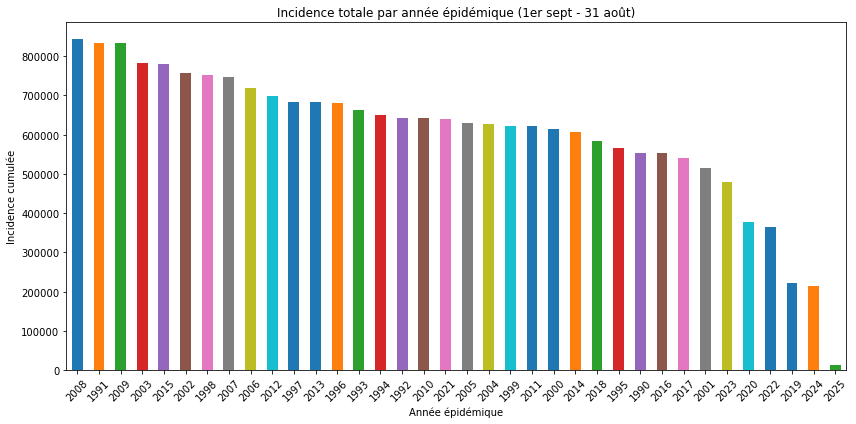

In [45]:
# Visualisation
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
incidence_par_annee.plot(kind='bar')
plt.title('Incidence totale par année épidémique (1er sept - 31 août)')
plt.xlabel('Année épidémique')
plt.ylabel('Incidence cumulée')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()